In [1]:
import time

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson

In [2]:
log_date = ['19-02-01', '19-02-02', '19-02-03', '19-02-04', '19-02-05', '19-02-06', '19-02-07', '19-02-08', '19-02-09', '19-02-10', '19-02-11', '19-02-12', '19-02-13', '19-02-14', '19-02-15', '19-02-16', '19-02-17', '19-02-18', '19-02-19', '19-02-20', '19-02-21', '19-02-22', '19-02-23', '19-02-24', '19-02-25', '19-02-26', '19-02-27', '19-02-28', '19-03-01', '19-03-02', '19-03-03', '19-03-04', '19-03-05', '19-03-06', '19-03-07', '19-03-08', '19-03-09', '19-03-10', '19-03-11', '19-03-12', '19-03-13', '19-03-14', '19-03-15', '19-03-16', '19-03-17', '19-03-18', '19-03-19', '19-03-20', '19-03-21', '19-03-22', '19-03-23', '19-03-24', '19-03-25', '19-03-26', '19-03-27', '19-03-28', '19-03-29', '19-03-30', '19-03-31', '19-04-01', '19-04-02', '19-04-03', '19-04-04', '19-04-05', '19-04-06', '19-04-07', '19-04-08', '19-04-09', '19-04-10', '19-04-11', '19-04-12', '19-04-13', '19-04-14', '19-04-15', '19-04-16', '19-04-17', '19-04-18', '19-04-19', '19-04-20', '19-04-21', '19-04-22', '19-04-23', '19-04-24', '19-04-25', '19-04-26', '19-04-27', '19-04-28', '19-04-29', '19-04-30', '19-05-01', '19-05-02', '19-05-03', '19-05-04', '19-05-05', '19-05-06', '19-05-07', '19-05-08', '19-05-09', '19-05-10', '19-05-11', '19-05-12', '19-05-13', '19-05-14', '19-05-15', '19-05-16', '19-05-17', '19-05-18', '19-05-19', '19-05-20', '19-05-21', '19-05-22', '19-05-23', '19-05-24', '19-05-25', '19-05-26', '19-05-27', '19-05-28', '19-05-29', '19-05-30', '19-05-31', '19-06-01', '19-06-02', '19-06-03', '19-06-04', '19-06-05', '19-06-06', '19-06-07', '19-06-08', '19-06-09', '19-06-10', '19-06-11', '19-06-12', '19-06-13', '19-06-14', '19-06-15', '19-06-16', '19-06-17', '19-06-18', '19-06-19', '19-06-20', '19-06-21', '19-06-22', '19-06-23', '19-06-24', '19-06-25', '19-06-26', '19-06-27', '19-06-28', '19-06-29', '19-06-30', '19-07-01', '19-07-02', '19-07-03', '19-07-04', '19-07-05', '19-07-06', '19-07-07', '19-07-08', '19-07-09', '19-07-10', '19-07-11', '19-07-12', '19-07-13', '19-07-14', '19-07-15', '19-07-16', '19-07-17', '19-07-18', '19-07-19', '19-07-20', '19-07-21', '19-07-22', '19-07-23', '19-07-24', '19-07-25', '19-07-26', '19-07-27', '19-07-28', '19-07-29', '19-07-30', '19-07-31', '19-08-01', '19-08-02', '19-08-03', '19-08-04', '19-08-05', '19-08-06', '19-08-07', '19-08-08', '19-08-09', '19-08-10', '19-08-11', '19-08-12', '19-08-13', '19-08-14', '19-08-15', '19-08-16', '19-08-17', '19-08-18', '19-08-19', '19-08-20', '19-08-21', '19-08-22', '19-08-23', '19-08-24', '19-08-25', '19-08-26', '19-08-27', '19-08-28', '19-08-29', '19-08-30', '19-08-31', '19-09-01', '19-09-02', '19-09-03', '19-09-04', '19-09-05', '19-09-06', '19-09-07', '19-09-08', '19-09-09', '19-09-10', '19-09-11', '19-09-12', '19-09-13', '19-09-14', '19-09-15', '19-09-16', '19-09-17', '19-09-18', '19-09-19', '19-09-20', '19-09-21', '19-09-22', '19-09-23', '19-09-24', '19-09-25', '19-09-26', '19-09-27', '19-09-28', '19-09-29', '19-09-30', '19-10-01', '19-10-02', '19-10-03', '19-10-04', '19-10-05', '19-10-06', '19-10-07', '19-10-08', '19-10-09', '19-10-10', '19-10-11', '19-10-12', '19-10-13', '19-10-14', '19-10-15', '19-10-16', '19-10-17', '19-10-18', '19-10-19', '19-10-20', '19-10-21', '19-10-22', '19-10-23', '19-10-24', '19-10-25', '19-10-26', '19-10-27', '19-10-28', '19-10-29', '19-10-30', '19-10-31', '19-11-01', '19-11-02', '19-11-03', '19-11-04', '19-11-05', '19-11-06', '19-11-07', '19-11-08', '19-11-09', '19-11-10', '19-11-11', '19-11-12', '19-11-13', '19-11-14', '19-11-15', '19-11-16', '19-11-17', '19-11-18', '19-11-19', '19-11-20', '19-11-21', '19-11-22', '19-11-23', '19-11-24', '19-11-25', '19-11-26', '19-11-27', '19-11-28', '19-11-29', '19-11-30', '19-12-01', '19-12-02', '19-12-03', '19-12-04', '19-12-05', '19-12-06', '19-12-07', '19-12-08', '19-12-09', '19-12-10', '19-12-11', '19-12-12', '19-12-13', '19-12-14', '19-12-15', '19-12-16', '19-12-17', '19-12-18', '19-12-19', '19-12-20', '19-12-21', '19-12-22', '19-12-23', '19-12-24', '19-12-25', '19-12-26', '19-12-27', '19-12-28', '19-12-29', '19-12-30', '19-12-31', '20-01-01', '20-01-02', '20-01-03', '20-01-04', '20-01-05', '20-01-06', '20-01-07', '20-01-08', '20-01-09', '20-01-10', '20-01-11', '20-01-12', '20-01-13', '20-01-14']
push_count = [736729, 511067, 528724, 709256, 740087, 828340, 855820, 876558, 711352, 726738, 933373, 959901, 964590, 910286, 848699, 628103, 660322, 895603, 953629, 949635, 955522, 917177, 659269, 701236, 975518, 1015931, 975017, 958305, 877648, 651934, 691516, 953642, 960052, 956920, 948127, 871289, 655612, 693005, 958071, 968218, 913213, 981776, 908980, 639149, 674015, 973138, 1015747, 1030862, 987880, 940083, 680284, 732752, 985210, 1015158, 988336, 960122, 923610, 657774, 698977, 942929, 1011466, 1024102, 1023094, 896419, 644560, 709638, 1019979, 944757, 1032029, 1016603, 944749, 691124, 719655, 960241, 1004906, 962822, 928066, 822771, 637555, 634379, 869363, 1007129, 997962, 987342, 920902, 655932, 720557, 950336, 986033, 846924, 932629, 869605, 655596, 731643, 945787, 973691, 845210, 956187, 919024, 646186, 666480, 944651, 998339, 989321, 979288, 904402, 635748, 670781, 937562, 986783, 969340, 960897, 879943, 615473, 635104, 863598, 970739, 924637, 942743, 908637, 641700, 664349, 941040, 980994, 969237, 968088, 855144, 607374, 643368, 921310, 987912, 985706, 981966, 876784, 598649, 624435, 918547, 947202, 938357, 912571, 861004, 601985, 644669, 914440, 956819, 945094, 928392, 837200, 579043, 592809, 881688, 920703, 910181, 819783, 788902, 598114, 613398, 915404, 960277, 938893, 964279, 890375, 603932, 630452, 925569, 959798, 958867, 940762, 899965, 615995, 638225, 922097, 969853, 933142, 898382, 852293, 600428, 663577, 969388, 1017800, 1009288, 987829, 915535, 643060, 659166, 954540, 982357, 978924, 955222, 893207, 640980, 643640, 918449, 958142, 971452, 881092, 885573, 651344, 716221, 980444, 986368, 1008115, 975142, 899282, 638546, 657839, 929137, 1010382, 1046002, 1020406, 921973, 650116, 683948, 893356, 970513, 1002060, 977504, 922181, 661898, 691059, 975349, 1011351, 991193, 286155, 660287, 668692, 697019, 997987, 1035935, 1030658, 1008518, 929352, 679834, 722942, 1012245, 981957, 1049101, 1034349, 965986, 706483, 745323, 994475, 959377, 960125, 963577, 927708, 698380, 730718, 981909, 1014043, 1009630, 959940, 958999, 738410, 731280, 1007130, 1045559, 1000966, 1008689, 961439, 724469, 764181, 1035013, 1085947, 1074606, 1008383, 959324, 700488, 728405, 1013830, 1003101, 925538, 954690, 909302, 685143, 718614, 1009602, 1027008, 1089694, 1075847, 1002722, 722901, 734530, 1026837, 1103263, 1085672, 1065596, 993674, 716144, 761068, 1037372, 1086351, 1067002, 1073715, 986711, 705113, 736264, 1072204, 1104737, 1055793, 954867, 859767, 691890, 765436, 1087212, 1135921, 1121567, 1109582, 1022900, 730604, 766976, 1084186, 1112616, 1101107, 1061678, 961088, 720602, 746224, 1029784, 1058494, 1029029, 999443, 913832, 640958, 648001, 823771, 720936, 597513, 717881, 731723, 620329, 627507, 792344, 693257, 570350, 854673, 879764, 703290, 727426, 945107, 1003707, 1028428, 1045746, 1000151, 729593, 748161, 1034195, 1067085]

df = pd.DataFrame({'log_date':log_date, 'push_count':push_count})
df.log_date = pd.to_datetime(df.log_date, format='%y-%m-%d')
df = df.assign(day_of_week = df.log_date.dt.dayofweek)

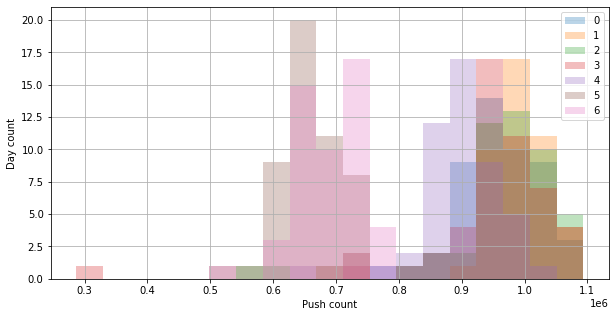

In [3]:
x_max = df.push_count.max()
x_min = df.push_count.min()
bins = np.arange(x_min, x_max, step=(x_max-x_min)/20)

plt.figure(figsize=(10,5))
legs = []
for dow, group in df.groupby('day_of_week'):
    group.push_count.hist(bins=bins, alpha=0.3)
    legs.append(dow)

plt.legend(legs)
plt.ylabel('Day count')
plt.xlabel('Push count')
plt.savefig(f"./images/4.8.0.png")
plt.show()

In [4]:
df['residual'] = df['push_count'] - df.groupby('day_of_week').push_count.transform('mean')
df['std_resi'] = (df['residual'] - df['residual'].mean()) / df['residual'].std()
df = df.assign(push_count_ma = df.push_count.rolling(28).mean())

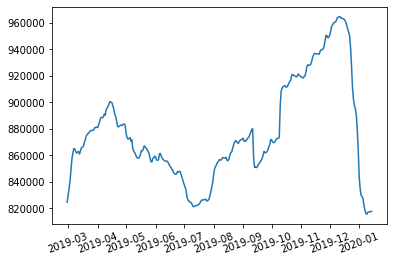

In [5]:
# MA plot
plt.plot(df.log_date, df.push_count_ma)
plt.xticks(rotation=20)
plt.savefig(f"./images/4.8.1.png")
plt.show()

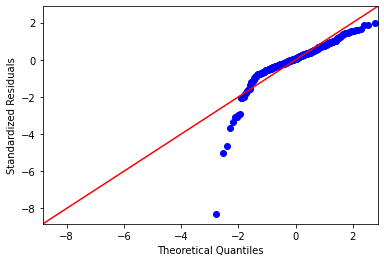

In [6]:
# QQ plot
sm.qqplot(df['std_resi'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig(f"./images/4.8.2.png")
plt.show()

In [7]:
# normality
w, pvalue = stats.shapiro(df.residual)
print(f"Normaility test p-value: {pvalue:.4f}")

# equal variance
w, pvalue = stats.bartlett(*[group.residual for dow, group in df.groupby('day_of_week')])
print(f"Equal variance test p-value: {pvalue:.4f}")

# independency
d = durbin_watson(df.residual)
print(f"Independence test statistic: {d:.4f}")

Normaility test p-value: 0.0000
Equal variance test p-value: 0.0000
Independence test statistic: 0.5847
